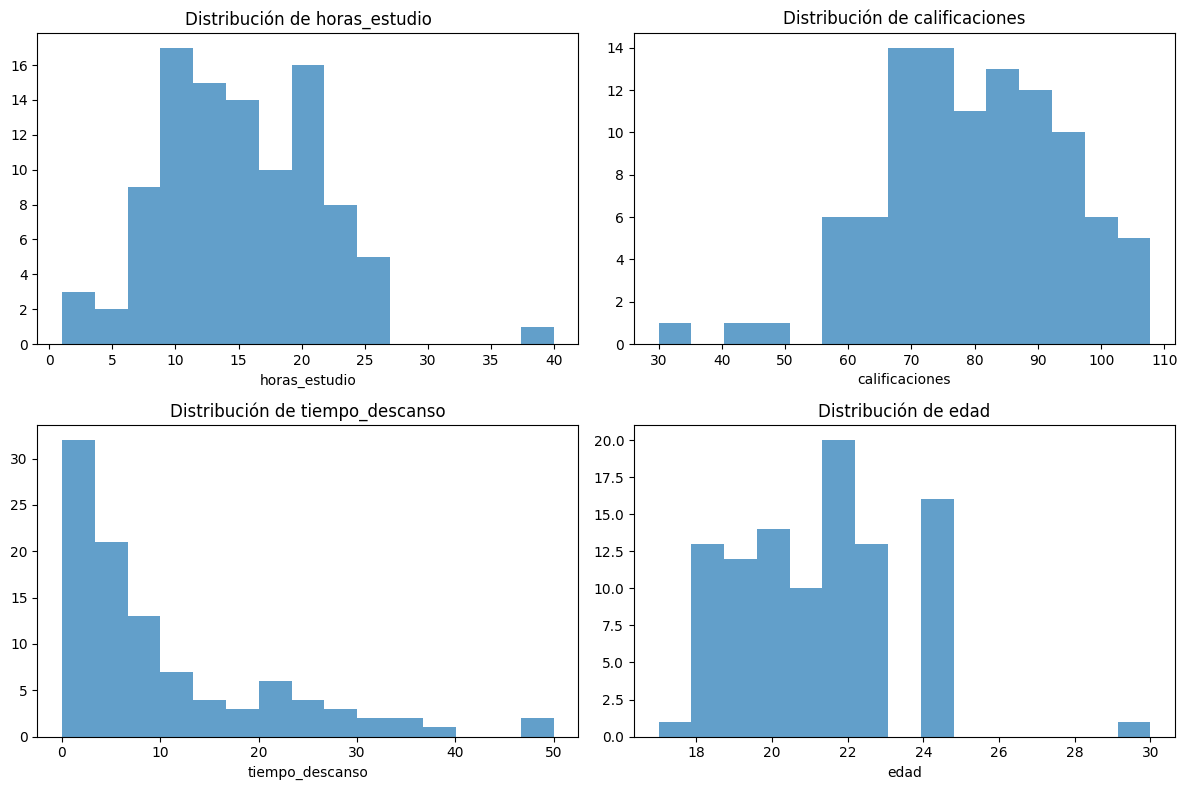

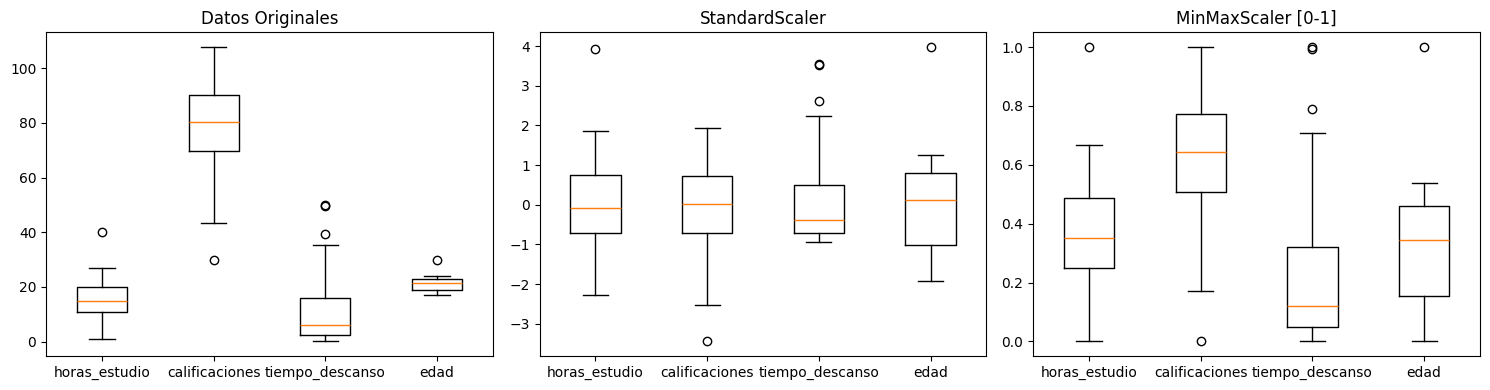

Sesgo original: 1.52
Sesgo después de log: -0.11


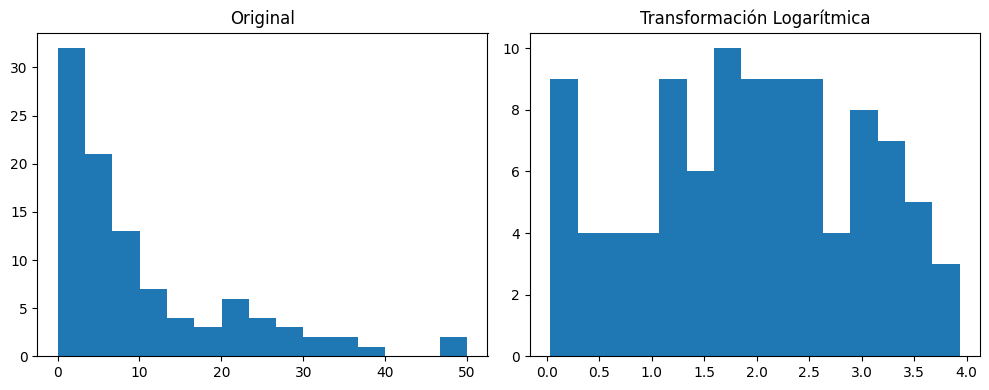

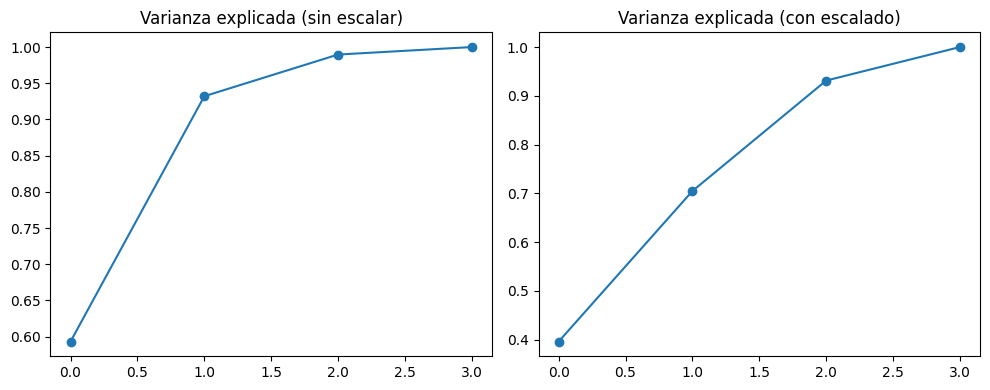

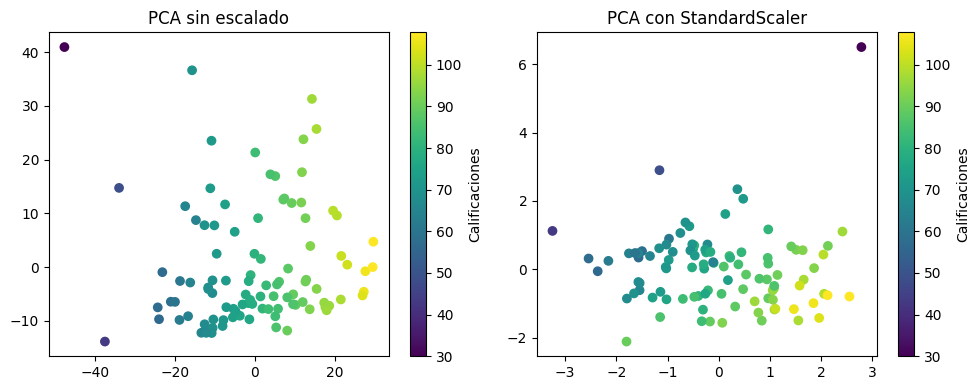

=== SIN ESCALAR ===
Componente Principal 1:
  horas_estudio: 0.238
  calificaciones: 0.961
  tiempo_descanso: -0.139
  edad: -0.017
  Varianza explicada: 59.31%

Componente Principal 2:
  horas_estudio: 0.258
  calificaciones: 0.075
  tiempo_descanso: 0.963
  edad: 0.022
  Varianza explicada: 33.89%

Componente Principal 3:
  horas_estudio: 0.914
  calificaciones: -0.256
  tiempo_descanso: -0.230
  edad: 0.217
  Varianza explicada: 5.76%

Componente Principal 4:
  horas_estudio: -0.205
  calificaciones: 0.072
  tiempo_descanso: 0.027
  edad: 0.976
  Varianza explicada: 1.04%


=== CON STANDARDSCALER ===
Componente Principal 1:
  horas_estudio: 0.743
  calificaciones: 0.572
  tiempo_descanso: 0.276
  edad: 0.212
  Varianza explicada: 39.63%

Componente Principal 2:
  horas_estudio: 0.042
  calificaciones: -0.555
  tiempo_descanso: 0.573
  edad: 0.602
  Varianza explicada: 30.85%

Componente Principal 3:
  horas_estudio: 0.020
  calificaciones: 0.048
  tiempo_descanso: -0.702
  edad: 0.7

In [4]:
# ======================================
# EJERCICIO PRÁCTICO CORREGIDO
# ======================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats

# --------------------------------------
# PARTE 1: ANÁLISIS EXPLORATORIO
# --------------------------------------
np.random.seed(123)
horas_estudio = np.random.normal(15, 5, 100)
calificaciones = 50 + 2*horas_estudio + np.random.normal(0, 8, 100)
tiempo_descanso = np.random.exponential(10, 100)
edad = np.random.randint(18, 25, 100)

data = pd.DataFrame({
    'horas_estudio': horas_estudio,
    'calificaciones': calificaciones,
    'tiempo_descanso': tiempo_descanso,
    'edad': edad
})

# Añadir outliers
data.loc[10] = [40, 30, 50, 30]  # outlier 1
data.loc[20] = [2, 90, 1, 17]     # outlier 2

# 1. Visualización inicial
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns):
    plt.subplot(2, 2, i+1)
    plt.hist(data[col], bins=15, alpha=0.7)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Pregunta 1: Identificar características sesgadas y escalas diferentes
# --------------------------------------
# PARTE 2: ESCALADO CORREGIDA
# --------------------------------------
scaler_z = StandardScaler()
data_z = pd.DataFrame(scaler_z.fit_transform(data), columns=data.columns)

scaler_minmax = MinMaxScaler()
data_minmax = pd.DataFrame(scaler_minmax.fit_transform(data), columns=data.columns)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.boxplot(data.values)
plt.xticks(range(1, len(data.columns)+1), data.columns)  # Corregido
plt.title('Datos Originales')

plt.subplot(1, 3, 2)
plt.boxplot(data_z.values)
plt.xticks(range(1, len(data.columns)+1), data.columns)  # Corregido
plt.title('StandardScaler')

plt.subplot(1, 3, 3)
plt.boxplot(data_minmax.values)
plt.xticks(range(1, len(data.columns)+1), data.columns)  # Corregido
plt.title('MinMaxScaler [0-1]')

plt.tight_layout()
plt.show()

# Pregunta 2: Impacto de outliers en escalados
# --------------------------------------
# PARTE 3: TRANSFORMACIONES
# --------------------------------------
data_log = data.copy()
data_log['tiempo_descanso'] = np.log(data_log['tiempo_descanso'] + 1)

skew_original = stats.skew(data['tiempo_descanso'])
skew_log = stats.skew(data_log['tiempo_descanso'])

print(f"Sesgo original: {skew_original:.2f}")
print(f"Sesgo después de log: {skew_log:.2f}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data['tiempo_descanso'], bins=15)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.hist(data_log['tiempo_descanso'], bins=15)
plt.title('Transformación Logarítmica')
plt.tight_layout()
plt.show()

# Pregunta 3: Importancia de reducir sesgo
# --------------------------------------
# PARTE 4: PCA Y REDUCCIÓN DE DIMENSIONALIDAD
# --------------------------------------
pca_raw = PCA()
pca_raw.fit(data)
components_raw = pca_raw.transform(data)

pca_scaled = PCA()
pca_scaled = pca_scaled.fit(data_z)
components_scaled = pca_scaled.transform(data_z)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca_raw.explained_variance_ratio_), 'o-')
plt.title('Varianza explicada (sin escalar)')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca_scaled.explained_variance_ratio_), 'o-')
plt.title('Varianza explicada (con escalado)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(components_raw[:, 0], components_raw[:, 1], c=data['calificaciones'])
plt.colorbar(label='Calificaciones')
plt.title('PCA sin escalado')
plt.subplot(1, 2, 2)
plt.scatter(components_scaled[:, 0], components_scaled[:, 1], c=data['calificaciones'])
plt.colorbar(label='Calificaciones')
plt.title('PCA con StandardScaler')
plt.tight_layout()
plt.show()

# Pregunta 4: Diferencias en PCA con/sin escalado
# --------------------------------------
# PARTE 5: INTERPRETACIÓN DE COMPONENTES
# --------------------------------------
def print_components(pca, features):
    for i, component in enumerate(pca.components_):
        print(f"Componente Principal {i+1}:")
        for j, weight in enumerate(component):
            print(f"  {features[j]}: {weight:.3f}")
        print(f"  Varianza explicada: {pca.explained_variance_ratio_[i]:.2%}")
        print()

print("=== SIN ESCALAR ===")
print_components(pca_raw, data.columns)
print("\n=== CON STANDARDSCALER ===")
print_components(pca_scaled, data.columns)

# Pregunta 5: Interpretación de componentes principales